In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

import pickle as pk
from time import time

In [2]:
# read in data
start=time()
print('reading in data...')
with open('data_all.pk','rb') as fp:
    foo = pk.load(fp)
print('elapsed: ',time()-start)

for x in foo:
    stmp = x+"= foo['"+x+"']"
    exec(stmp)

reading in data...
elapsed:  5.277423143386841


In [3]:
[x for x in foo]

['bcountries',
 'bcountries_1',
 'c_countries',
 'countries',
 'countries_common',
 'countries_common_x',
 'countries_jhu',
 'countries_jhu_2_owid',
 'countries_jhu_4_owid',
 'countries_jhu_non_special',
 'countries_jhu_overseas',
 'countries_owid',
 'countries_owid_to_jhu',
 'countrynms',
 'countrysets',
 'd_countries',
 'dcountries',
 'jhu_to_owid_str_country',
 'lc_countries',
 'lcountries',
 'nc_countries',
 'owid_to_jhu_str_country',
 'pc_countries',
 'scountries',
 'covid_owid',
 'covid_owid_ts',
 'covid_ts',
 'clusdata_all',
 'cases',
 'datasets',
 'deaths',
 'deaths_owid',
 'deaths_raw',
 'mindeaths',
 'mindeathspm',
 'new_deaths_c_spm_jhu',
 'new_deaths_c_spm_owid',
 'new_deaths_pm_jhu',
 'new_deaths_pm_owid',
 'new_deaths_spm',
 'new_deaths_spm_jhu',
 'new_deaths_spm_owid',
 'short_deaths',
 'short_deaths_c',
 'short_deaths_est',
 'total_deaths',
 'total_deaths_cs_jhu',
 'total_deaths_cs_owid',
 'total_deaths_jhu',
 'total_deaths_owid',
 'total_deaths_s_jhu',
 'total_deaths_s

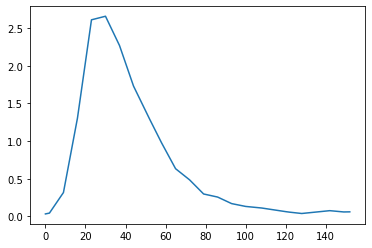

In [4]:
plt.plot(clusdata_all['deaths']['Germany']);

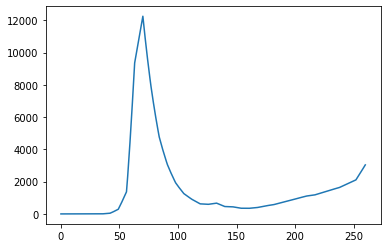

In [5]:
plt.plot(new_cases_c_nonlinr_owid['Germany']);

# Consensus basics

In [6]:
# from Consensus import *
# NB:  scoping problem seems to prevent import from working properly.
# instead use exec below.

In [7]:
exec(open('Consensus.py','r').read())

In [8]:
#foo = Consensus(cases=['deaths','cases','cases_nonlinr'])
foo = Consensus()

In [9]:
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [10]:
# import warnings
# warnings.simplefilter('error', RuntimeWarning)   # to replace warnings by errors to allow traceback
# warnings.simplefilter('error',DeprecationWarning)

In [11]:
# loop over 24 scans: 4* cases index + scoring method (max validity or min score options) 0 to 3:
# 0 validity = max(validity,0.001)
# 1 validitysc = rescale(validity,ncomp)  # rescaled to account for biasses in number of components of projection
# 2 score1 = 1.0/validitysc + float(nunclustered)/5. + np.abs(float(nclus)-4.)/2.  # penalizes additively
# 3 score2 = float(nunclustered)*(4.+np.abs(nclus-4.))/(validitysc*20.)            # penalizes multiplicatively : all criteria required
foo.scan(diag=True) # diag=False for no output except progress bar

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   66 clustered;   6 unclustered;  validity = 0.39991 validitysc = 0.39991 score1: 4.201 score2: 3.751
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   66 clustered;   6 unclustered;  validity = 0.39991 validitysc = 0.39991 score1: 4.201 score2: 3.751
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   10 unclustered;  validity = 0.40804 validitysc = 0.40804 score1: 4.451 score2: 4.901
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   57 clustered;   15 unclustered;  validity = 0.38807 validitysc = 0.38807 score1: 6.077 score2: 9.663
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   57 clustered;   15 unclustered;  validity = 0.38807 validitysc = 0.38807 score1: 6.077 score2: 9.663
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   57 clustered;   15 unclustered;  validity = 0.3

hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.27453 validitysc = 0.49684 score1: 3.413 score2: 1.208
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.27453 validitysc = 0.49684 score1: 3.413 score2: 1.208
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.27453 validitysc = 0.49684 score1: 3.413 score2: 1.208
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.27453 validitysc = 0.49684 score1: 3.413 score2: 1.208
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.27453 validitysc = 0.49684 score1: 3.413 score2: 1.208
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.27453 validitysc = 0.49684 score1: 3.413 score2: 1.208
----------

--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   52 clustered;   20 unclustered;  validity = 0.3597 validitysc = 0.44119 score1: 8.767 score2: 20.399
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   57 clustered;   15 unclustered;  validity = 0.35519 validitysc = 0.43637 score1: 6.292 score2: 10.312
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   63 clustered;   9 unclustered;  validity = 0.26807 validitysc = 0.33983 score1: 4.743 score2: 5.297
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   63 clustered;   9 unclustered;  validity = 0.26807 validitysc = 0.33983 score1: 4.743 score2: 5.297
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   63 clustered;   9 unclustered;  validity = 0.26807 validitysc = 0.33983 score1: 4.743 score2: 5.297
hdbscan:  8 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   63 clustered;   9 unclustered;  validity = 0.26807 validitysc = 0.33983 score1: 4.743 

hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   66 clustered;   6 unclustered;  validity = 0.09297 validitysc = 0.21102 score1: 6.939 score2: 8.53
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   66 clustered;   6 unclustered;  validity = 0.09297 validitysc = 0.21102 score1: 6.939 score2: 8.53
--------------------------
hdbscan:  3 minc:   2 mins:   11 FPCAcomponents:   7 clusters;   48 clustered;   24 unclustered;  validity = 0.27169 validitysc = 0.50224 score1: 8.291 score2: 16.725
hdbscan:  4 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   51 clustered;   21 unclustered;  validity = 0.26699 validitysc = 0.49627 score1: 6.715 score2: 10.579
hdbscan:  5 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   51 clustered;   21 unclustered;  validity = 0.26699 validitysc = 0.49627 score1: 6.715 score2: 10.579
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   51 clustered;   21 unclustered;  validity = 0.26699 validitysc = 0.49627 score1

hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   8 clusters;   58 clustered;   14 unclustered;  validity = 0.26947 validitysc = 0.38445 score1: 7.401 score2: 14.566
hdbscan:  4 minc:   2 mins:   4 FPCAcomponents:   7 clusters;   58 clustered;   14 unclustered;  validity = 0.22616 validitysc = 0.33103 score1: 7.321 score2: 14.802
hdbscan:  5 minc:   2 mins:   4 FPCAcomponents:   5 clusters;   61 clustered;   11 unclustered;  validity = 0.18315 validitysc = 0.27517 score1: 6.334 score2: 9.994
hdbscan:  6 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   63 clustered;   9 unclustered;  validity = 0.19456 validitysc = 0.29028 score1: 5.245 score2: 6.201
hdbscan:  7 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   63 clustered;   9 unclustered;  validity = 0.19456 validitysc = 0.29028 score1: 5.245 score2: 6.201
hdbscan:  8 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   63 clustered;   9 unclustered;  validity = 0.19456 validitysc = 0.29028 score1: 5.245 score2: 6.201
hdbscan:  9

hdbscan:  8 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   60 clustered;   12 unclustered;  validity = 0.25702 validitysc = 0.48337 score1: 4.469 score2: 4.965
hdbscan:  9 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   60 clustered;   12 unclustered;  validity = 0.25702 validitysc = 0.48337 score1: 4.469 score2: 4.965
--------------------------
hdbscan:  3 minc:   2 mins:   12 FPCAcomponents:   6 clusters;   59 clustered;   13 unclustered;  validity = 0.25104 validitysc = 0.4834 score1: 5.669 score2: 8.068
hdbscan:  4 minc:   2 mins:   12 FPCAcomponents:   6 clusters;   59 clustered;   13 unclustered;  validity = 0.25104 validitysc = 0.4834 score1: 5.669 score2: 8.068
hdbscan:  5 minc:   2 mins:   12 FPCAcomponents:   5 clusters;   55 clustered;   17 unclustered;  validity = 0.23745 validitysc = 0.46505 score1: 6.05 score2: 9.139
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   4 clusters;   60 clustered;   12 unclustered;  validity = 0.25901 validitysc = 0.49389 score1: 

hdbscan:  7 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   64 clustered;   8 unclustered;  validity = 0.001 validitysc = 0.00169 score1: 593.125 score2: 1182.051
hdbscan:  8 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   64 clustered;   8 unclustered;  validity = 0.001 validitysc = 0.00169 score1: 593.125 score2: 1182.051
hdbscan:  9 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   64 clustered;   8 unclustered;  validity = 0.001 validitysc = 0.00169 score1: 593.125 score2: 1182.051
--------------------------
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   8 clusters;   60 clustered;   12 unclustered;  validity = 0.29355 validitysc = 0.4433 score1: 6.656 score2: 10.828
hdbscan:  4 minc:   2 mins:   5 FPCAcomponents:   7 clusters;   61 clustered;   11 unclustered;  validity = 0.2594 validitysc = 0.40162 score1: 6.19 score2: 9.586
hdbscan:  5 minc:   2 mins:   5 FPCAcomponents:   6 clusters;   57 clustered;   15 unclustered;  validity = 0.22137 validitysc = 0.35268 score1:

hdbscan:  7 minc:   2 mins:   12 FPCAcomponents:   3 clusters;   63 clustered;   9 unclustered;  validity = 0.25342 validitysc = 0.48656 score1: 4.355 score2: 4.624
hdbscan:  8 minc:   2 mins:   12 FPCAcomponents:   3 clusters;   63 clustered;   9 unclustered;  validity = 0.25342 validitysc = 0.48656 score1: 4.355 score2: 4.624
hdbscan:  9 minc:   2 mins:   12 FPCAcomponents:   3 clusters;   63 clustered;   9 unclustered;  validity = 0.25342 validitysc = 0.48656 score1: 4.355 score2: 4.624
--------------------------
hdbscan:  3 minc:   2 mins:   13 FPCAcomponents:   7 clusters;   56 clustered;   16 unclustered;  validity = 0.33091 validitysc = 0.57996 score1: 6.424 score2: 9.656
hdbscan:  4 minc:   2 mins:   13 FPCAcomponents:   7 clusters;   56 clustered;   16 unclustered;  validity = 0.33091 validitysc = 0.57996 score1: 6.424 score2: 9.656
hdbscan:  5 minc:   2 mins:   13 FPCAcomponents:   5 clusters;   61 clustered;   11 unclustered;  validity = 0.25711 validitysc = 0.49141 score1: 

hdbscan:  6 minc:   2 mins:   5 FPCAcomponents:   4 clusters;   59 clustered;   13 unclustered;  validity = 0.31732 validitysc = 0.4711 score1: 4.723 score2: 5.519
hdbscan:  7 minc:   2 mins:   5 FPCAcomponents:   4 clusters;   59 clustered;   13 unclustered;  validity = 0.31732 validitysc = 0.4711 score1: 4.723 score2: 5.519
hdbscan:  8 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.01454 validitysc = 0.02749 score1: 37.779 score2: 21.827
hdbscan:  9 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   70 clustered;   2 unclustered;  validity = 0.01454 validitysc = 0.02749 score1: 37.779 score2: 21.827
--------------------------
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   6 clusters;   65 clustered;   7 unclustered;  validity = 0.33742 validitysc = 0.51661 score1: 4.336 score2: 4.065
hdbscan:  4 minc:   2 mins:   6 FPCAcomponents:   4 clusters;   62 clustered;   10 unclustered;  validity = 0.21453 validitysc = 0.36435 score1: 4.74

hdbscan:  8 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   68 clustered;   4 unclustered;  validity = 0.1053 validitysc = 0.24732 score1: 5.843 score2: 4.852
hdbscan:  9 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   68 clustered;   4 unclustered;  validity = 0.1053 validitysc = 0.24732 score1: 5.843 score2: 4.852
--------------------------
hdbscan:  3 minc:   2 mins:   13 FPCAcomponents:   6 clusters;   63 clustered;   9 unclustered;  validity = 0.32198 validitysc = 0.57003 score1: 4.554 score2: 4.737
hdbscan:  4 minc:   2 mins:   13 FPCAcomponents:   4 clusters;   57 clustered;   15 unclustered;  validity = 0.31714 validitysc = 0.56457 score1: 4.771 score2: 5.314
hdbscan:  5 minc:   2 mins:   13 FPCAcomponents:   4 clusters;   57 clustered;   15 unclustered;  validity = 0.31714 validitysc = 0.56457 score1: 4.771 score2: 5.314
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   4 clusters;   57 clustered;   15 unclustered;  validity = 0.31714 validitysc = 0.56457 score1: 4.

hdbscan:  7 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30748 validitysc = 0.45971 score1: 5.275 score2: 7.07
hdbscan:  8 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30748 validitysc = 0.45971 score1: 5.275 score2: 7.07
hdbscan:  9 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.30748 validitysc = 0.45971 score1: 5.275 score2: 7.07
--------------------------
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   6 clusters;   62 clustered;   10 unclustered;  validity = 0.28403 validitysc = 0.4543 score1: 5.201 score2: 6.604
hdbscan:  4 minc:   2 mins:   6 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.26665 validitysc = 0.43281 score1: 5.41 score2: 7.509
hdbscan:  5 minc:   2 mins:   6 FPCAcomponents:   5 clusters;   59 clustered;   13 unclustered;  validity = 0.26665 validitysc = 0.43281 score1: 5.41 sco

hdbscan:  7 minc:   2 mins:   13 FPCAcomponents:   5 clusters;   58 clustered;   14 unclustered;  validity = 0.32053 validitysc = 0.5684 score1: 5.059 score2: 6.158
hdbscan:  8 minc:   2 mins:   13 FPCAcomponents:   5 clusters;   58 clustered;   14 unclustered;  validity = 0.32053 validitysc = 0.5684 score1: 5.059 score2: 6.158
hdbscan:  9 minc:   2 mins:   13 FPCAcomponents:   4 clusters;   58 clustered;   14 unclustered;  validity = 0.31998 validitysc = 0.56778 score1: 4.561 score2: 4.932
--------------------------
hdbscan:  3 minc:   2 mins:   14 FPCAcomponents:   7 clusters;   57 clustered;   15 unclustered;  validity = 0.29705 validitysc = 0.54122 score1: 6.348 score2: 9.7
hdbscan:  4 minc:   2 mins:   14 FPCAcomponents:   5 clusters;   57 clustered;   15 unclustered;  validity = 0.36037 validitysc = 0.61134 score1: 5.136 score2: 6.134
hdbscan:  5 minc:   2 mins:   14 FPCAcomponents:   5 clusters;   57 clustered;   15 unclustered;  validity = 0.36037 validitysc = 0.61134 score1: 5

In [12]:
len(foo.report)

24

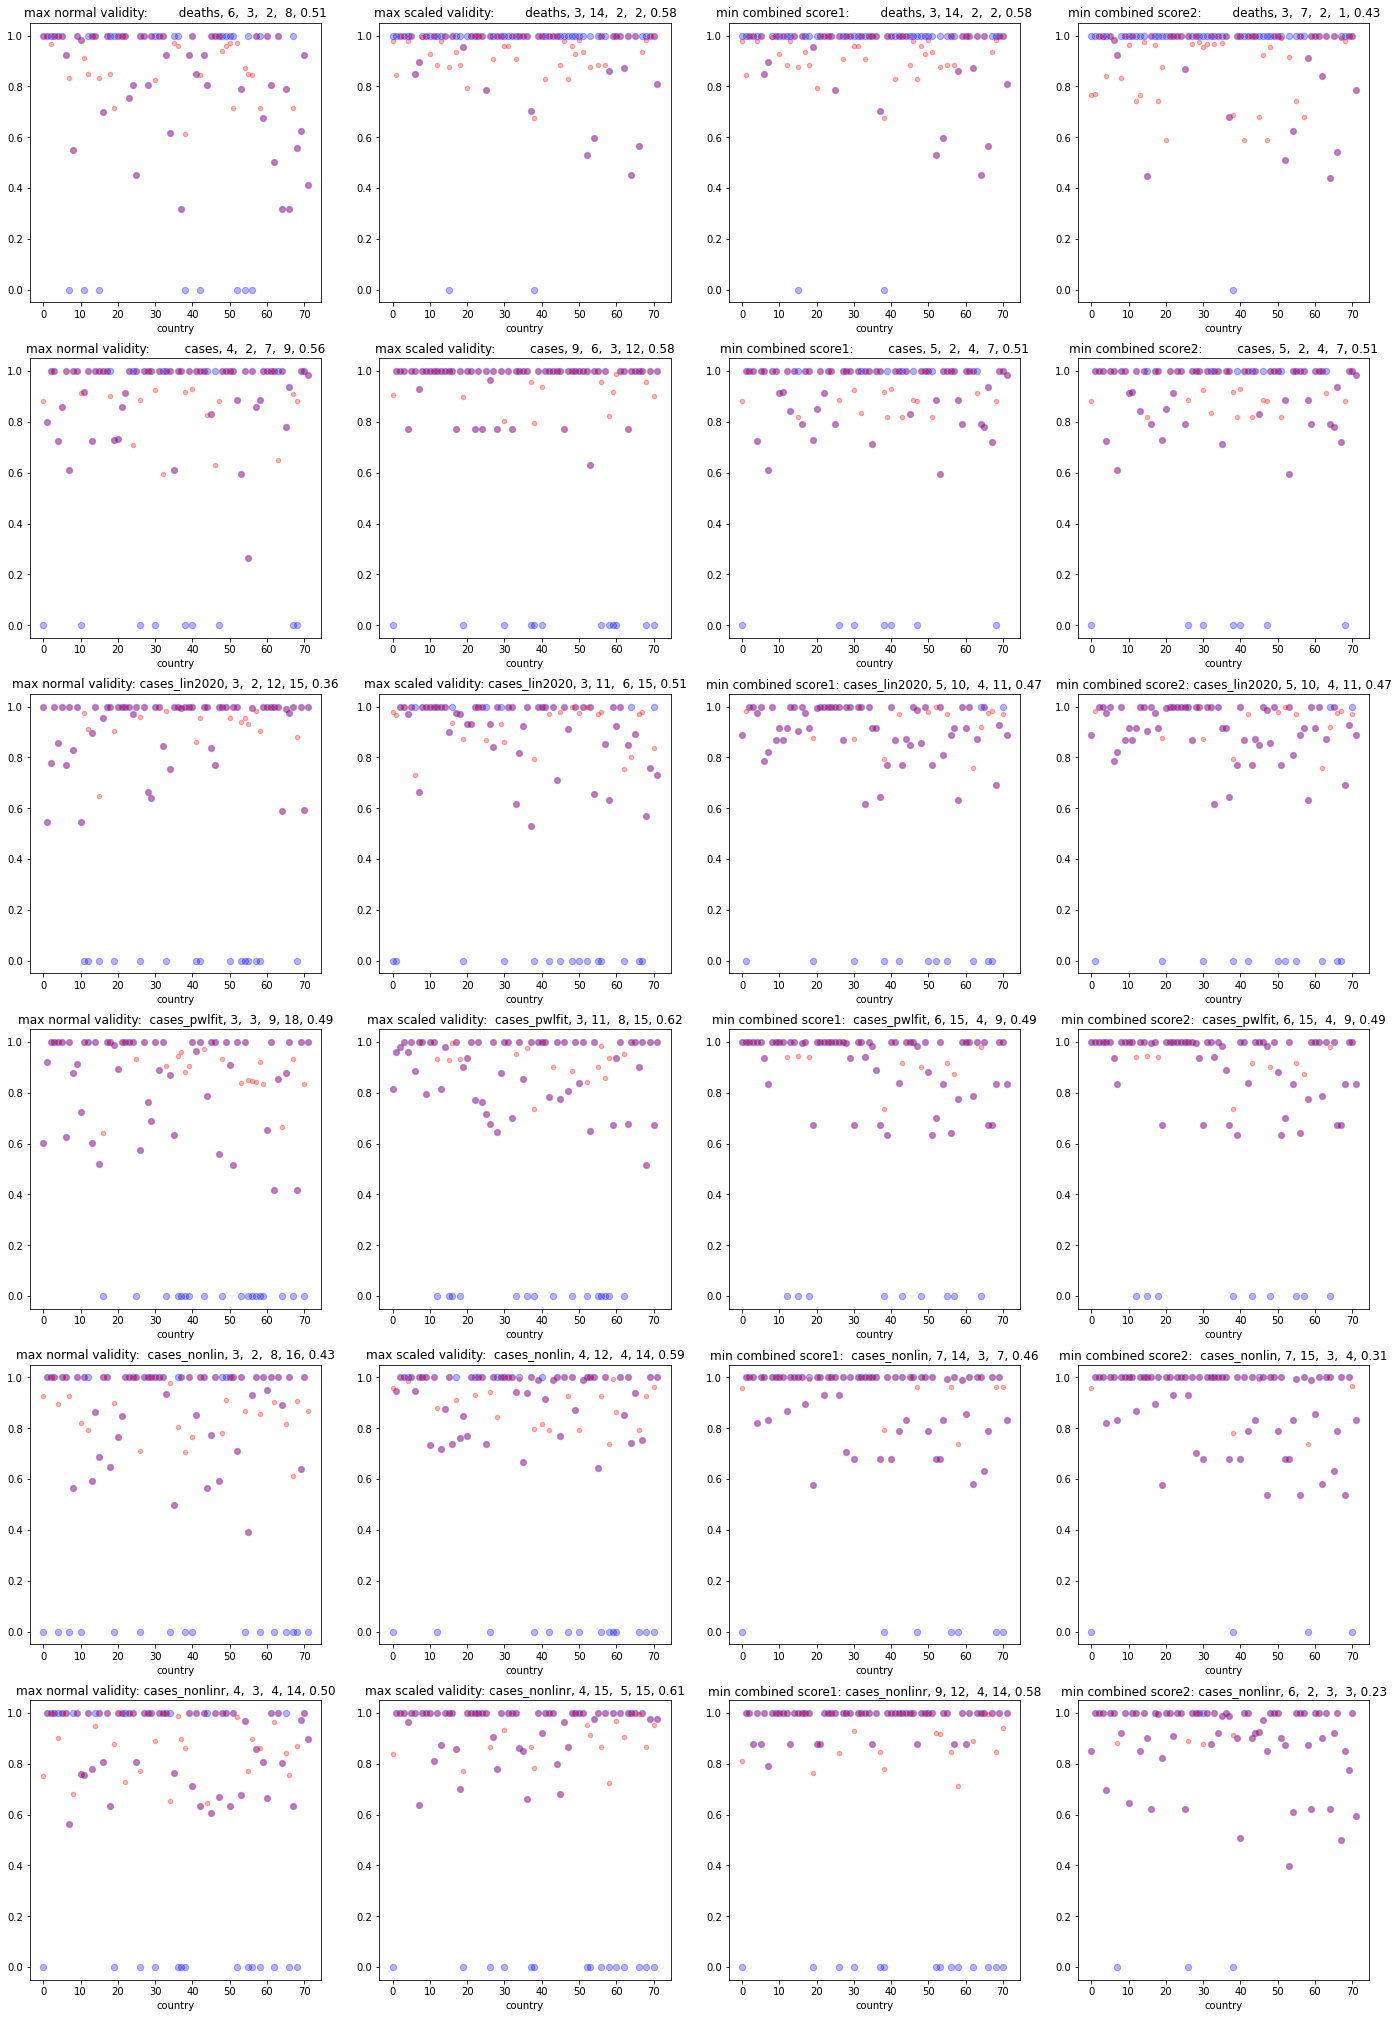

In [13]:
# plot of probability of countries being in cluster (blue) and 1- outlier score (red)
# extracted to paper figure in Assembled_Figs.pptx
foo.plot_outliers()

**Must do this to graph any of the clusterings...**

In [14]:
foo.make_clusters()

reference clustering (numbered from 0) is 7


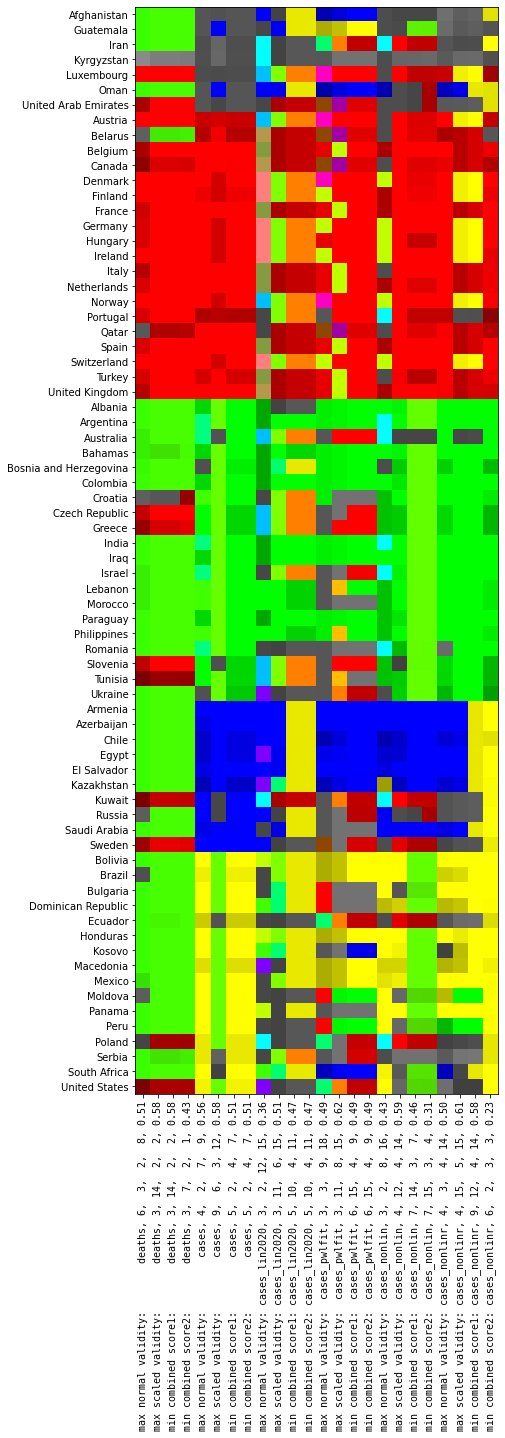

In [15]:
foo.plot_stage(3)

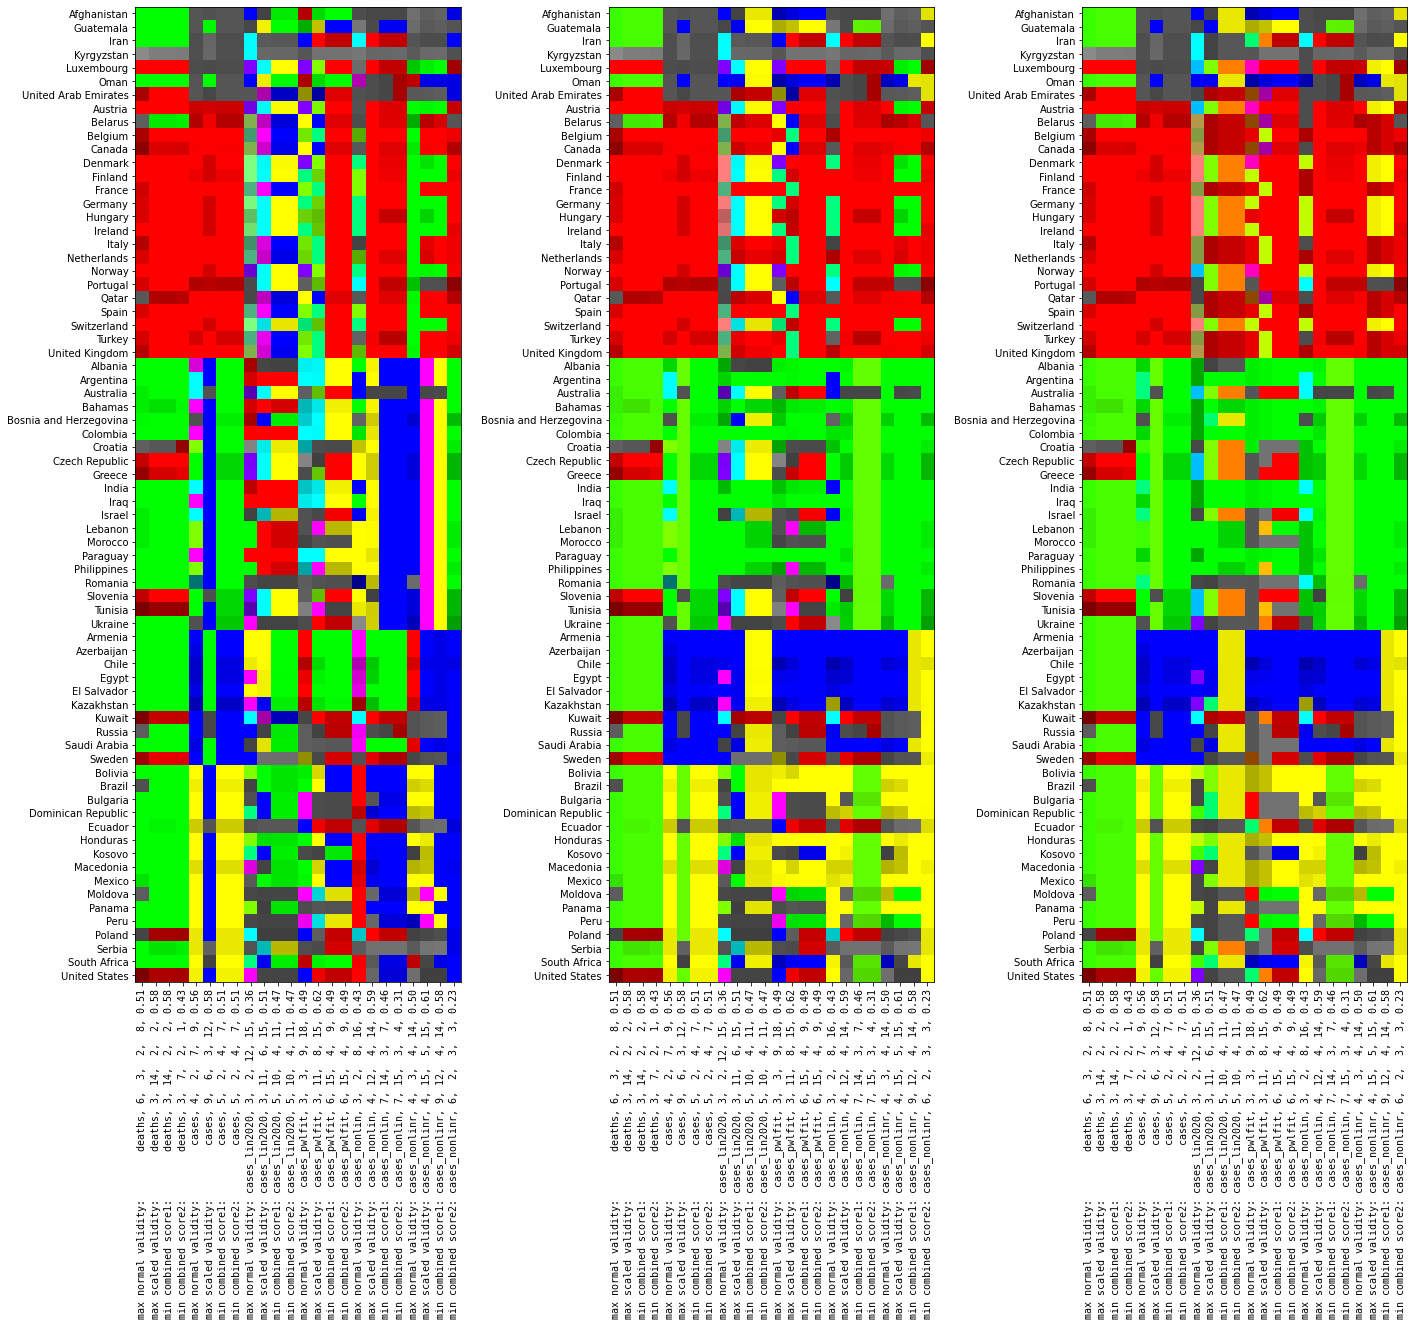

In [16]:
# the end result here is with the countries ordered by the refclustering column (the one with the best score2)
# see swizzle below to reorder countries by means of the consensus clusters
foo.plot_all_stages()

In [17]:
foo.swizzle(satthresh=0.75) # the closer the satthresh to one, the more countries end up in unclustered
print(len(foo.classes))
print(foo.classes)

72
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]


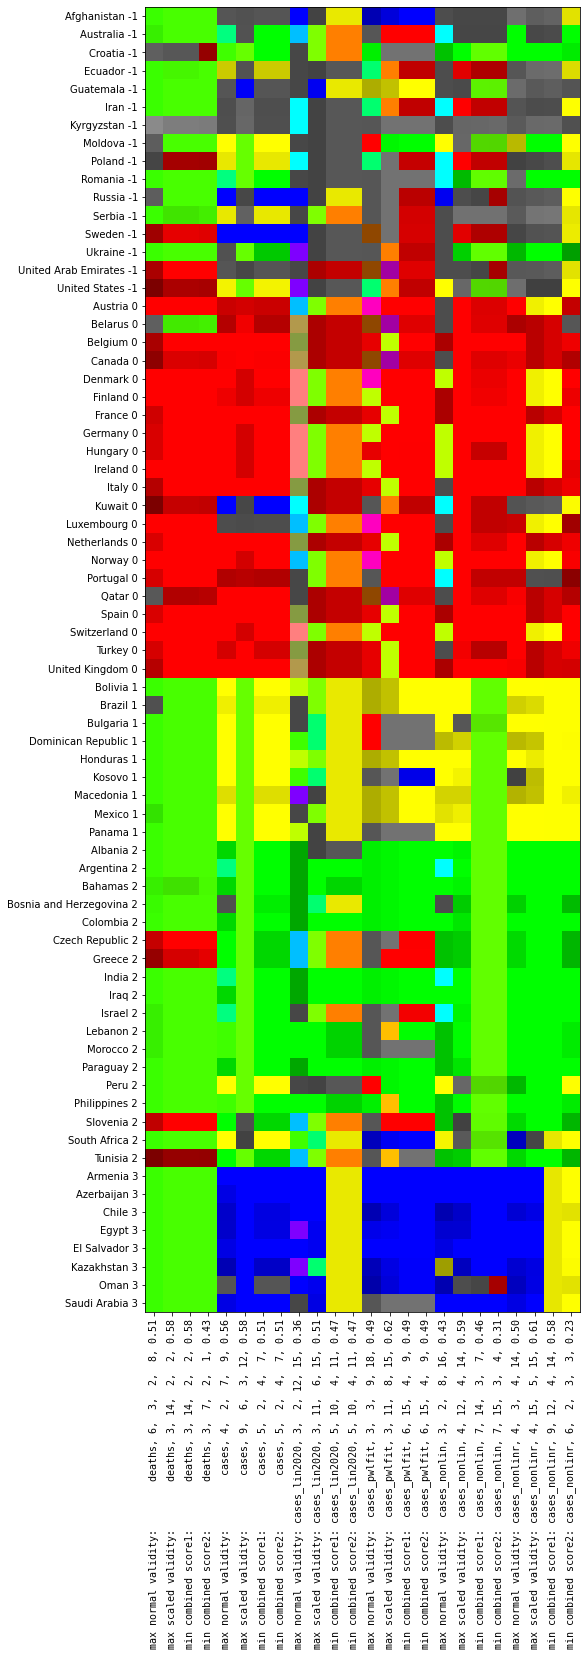

In [18]:
foo.plot_swiz()


**Check to see classes are same as old swizzle2:**

In [19]:
fooo = swizzle2(foo.countries,foo.coldata_adj2,foo.cols,foo.refclustering)

-------class 0 ---------
0 4 Austria
1 6 Bahamas
2 7 Belarus
3 8 Belgium
4 9 Bolivia
5 10 Bosnia and Herzegovina
6 11 Brazil
7 12 Bulgaria
8 13 Chile
9 14 Colombia
10 15 Croatia
11 16 Czech Republic
12 17 Denmark
13 18 Dominican Republic
14 19 Ecuador
15 20 Egypt
16 21 El Salvador
17 22 Finland
18 23 France
19 24 Germany
20 25 Greece
21 52 Poland
22 55 Romania
-------class 1 ---------
23 1 Albania
24 2 Argentina
25 33 Israel
26 34 Italy
27 43 Morocco
28 44 Netherlands
29 53 Portugal
30 56 Russia
31 57 Saudi Arabia
32 58 Serbia
33 59 Slovenia
34 60 South Africa
35 61 Spain
36 62 Sweden
37 63 Switzerland
38 64 Tunisia
39 65 Turkey
40 66 United States
41 68 United Arab Emirates
42 69 United Kingdom
43 71 Canada
-------class 2 ---------
44 26 Guatemala
45 27 Honduras
46 28 Hungary
47 29 India
48 30 Iran
49 31 Iraq
50 32 Ireland
51 35 Kazakhstan
52 36 Kosovo
53 37 Kuwait
54 38 Kyrgyzstan
55 39 Lebanon
56 40 Luxembourg
57 41 Mexico
58 42 Moldova
59 45 Macedonia
60 67 Ukraine
61 70 Australia


In [20]:
foo.swdic

{0: ['Luxembourg',
  'Austria',
  'Belarus',
  'Belgium',
  'Canada',
  'Denmark',
  'Finland',
  'France',
  'Germany',
  'Hungary',
  'Ireland',
  'Italy',
  'Netherlands',
  'Norway',
  'Portugal',
  'Qatar',
  'Spain',
  'Switzerland',
  'Turkey',
  'United Kingdom',
  'Kuwait'],
 1: ['Bolivia',
  'Brazil',
  'Bulgaria',
  'Dominican Republic',
  'Honduras',
  'Kosovo',
  'Macedonia',
  'Mexico',
  'Panama'],
 2: ['Albania',
  'Argentina',
  'Bahamas',
  'Bosnia and Herzegovina',
  'Colombia',
  'Czech Republic',
  'Greece',
  'India',
  'Iraq',
  'Israel',
  'Lebanon',
  'Morocco',
  'Paraguay',
  'Philippines',
  'Slovenia',
  'Tunisia',
  'Peru',
  'South Africa'],
 3: ['Oman',
  'Armenia',
  'Azerbaijan',
  'Chile',
  'Egypt',
  'El Salvador',
  'Kazakhstan',
  'Saudi Arabia'],
 -1: ['Afghanistan',
  'Guatemala',
  'Iran',
  'Kyrgyzstan',
  'United Arab Emirates',
  'Australia',
  'Croatia',
  'Romania',
  'Ukraine',
  'Russia',
  'Sweden',
  'Ecuador',
  'Moldova',
  'Poland',

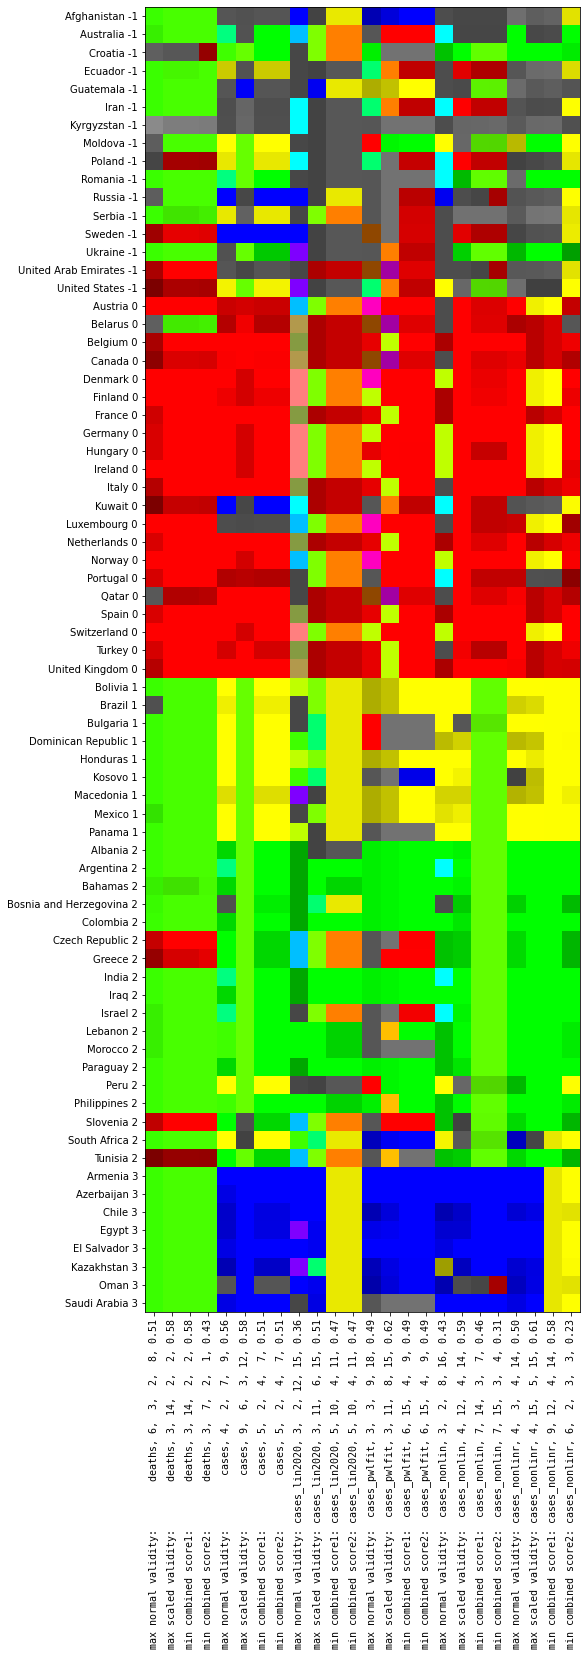

In [21]:
foo.plot_swiz()

In [22]:
foo.refclustering

7